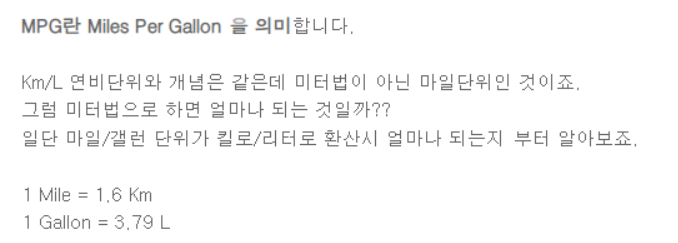

필요한 라이브러리 import

In [1]:
# 경고 메세지 출력 안하기
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정

# 데이터수집

# 데이터 준비 및 탐색

In [4]:
car_df = pd.read_csv('../data/auto-mpg.csv')
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [21]:
# 변환 값
# 1 갤런 = 3. 79 L
# 1 마일 : 1.6 km
# 1 mpg 1.6 / 3.79 = 0.42

# mpg_to_km = 0.42
# car_df['km/L'] = car_df['mpg'] * mpg_to_km
# car_df.head(3)

In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


☝피쳐의 의미☝

displacement 배기량

acceleration 제로백

cylinders 실린더 갯수

origin 출시 국가

model_year 출시 연도

# 분석 모델 구축

In [6]:
y = car_df['mpg']
X = car_df.drop(['mpg', 'origin', 'car_name','horsepower'], axis=1)

In [7]:
from sklearn.model_selection import train_test_split
    
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# train, test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [9]:
# 잘 분할됐는지 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(318, 5) (318,)
(80, 5) (80,)


In [38]:
# 선형 회귀 분석 : 모델 생성(LinearRegression)
lr = LinearRegression()
# 모델 훈련
lr.fit(X_train, y_train)

# test 예측
Y_predict = lr.predict(X_test)
# train 예측
Y_predict2 = lr.predict(X_train)

# 결과 분석 및 시각화

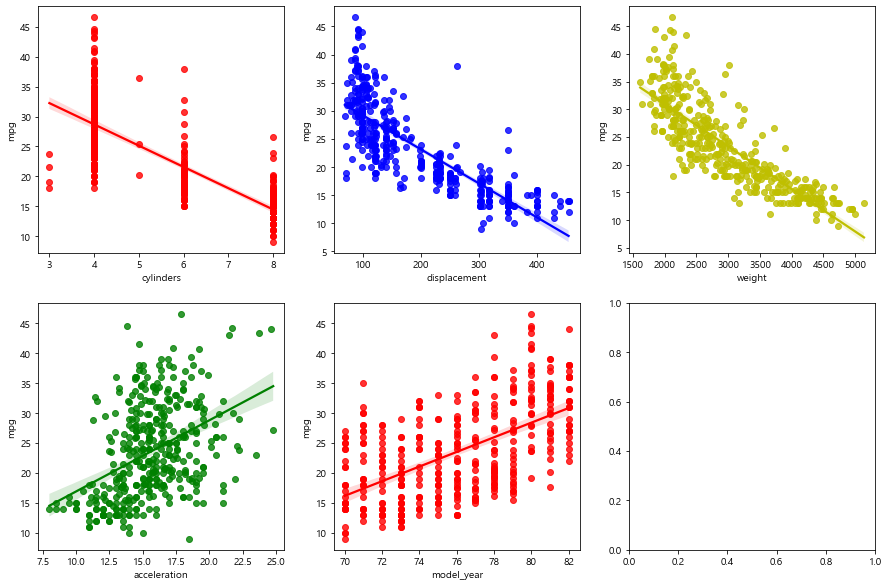

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig, axs = plt.subplots(figsize=(15, 10), ncols=3, nrows=2)

x_features = [
    'cylinders', 'displacement', 'weight', 'acceleration', 'model_year'
]
plot_color = ['r','b','y','g','r']

for i, feature in enumerate(x_features):
    # 한 줄에 3개씩 넣어라
    row = int(i / 3)
    # 3개 이상 들어가면 되서 계산
    col = i % 3
    # x, y는 컬럼명
    sns.regplot(x=feature, y='mpg', data=car_df, ax=axs[row][col], color=plot_color[i])

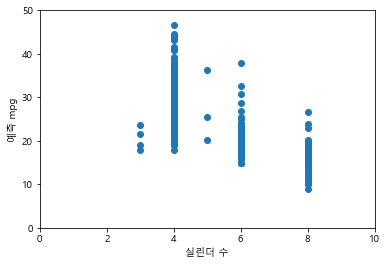

In [37]:
# 절편
lr.intercept_
# 회귀계수
lr.coef_

plt.scatter(X.cylinders, y)
plt.plot([0, 10], [lr.intercept_, 10 * lr.coef_[0] + lr.intercept_], c='r')
plt.xlim(0, 10)
plt.ylim(0, 50)
plt.xlabel("실린더 수")
plt.ylabel("예측 mpg")
# plt.title('MPG Result')
plt.show()

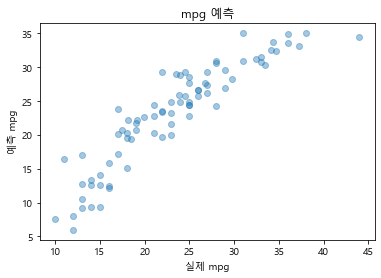

In [13]:
plt.scatter(y_test, Y_predict, alpha=0.4)
plt.xlabel("실제 mpg")
plt.ylabel("예측 mpg")
plt.title("mpg 예측")
plt.show()

mpg가 낮은 항목들은 꽤 가깝게 맞추는데, 높은 mpg에서는 오차가 좀 있는 걸 알 수 있다.

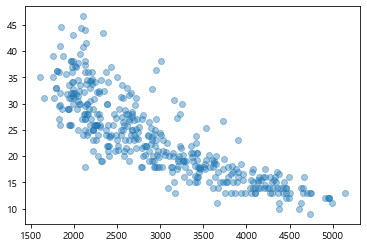

In [14]:
# 차 무게 'weight' 와 'mpg' 상관관계
plt.scatter(car_df[['weight']], car_df[['mpg']], alpha=0.4)
plt.show()

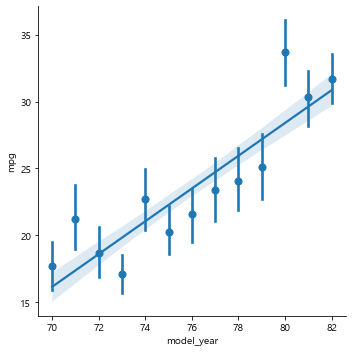

In [15]:
sns.lmplot(x='model_year', y='mpg', data=car_df, x_estimator=np.mean)

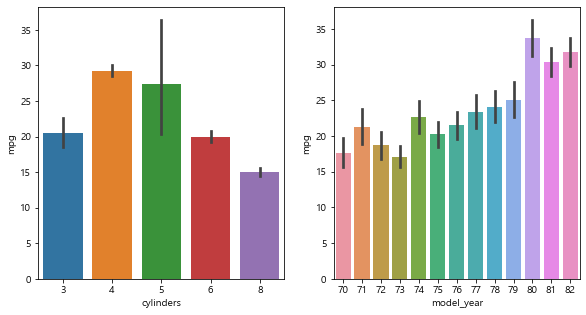

In [16]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)

sns.barplot(x='cylinders', y='mpg', data=car_df, ax=ax1)
sns.barplot(x='model_year', y='mpg', data=car_df, ax=ax2)

plt.show()

## 정확도 계산

train, test 데이터의 r2, mse, rmse를 비교

test

In [17]:
# 오차들을 제곱한다.
mse = mean_squared_error(y_test, Y_predict)
# mse에 root를 씌운게 rmse다
rmse = np.sqrt(mse) 
print(f'MSE : {mse:.3f}, RMSE : {rmse:.3f}')
# r2에 정답, 예측을 넣으면 점수나옴
print(f'R^2(Variance score) : {r2_score(y_test, Y_predict):.3f}') 

MSE : 9.443, RMSE : 3.073
R^2(Variance score) : 0.824


train

In [39]:
# 오차들을 제곱한다.
mse = mean_squared_error(y_train, Y_predict2)
# mse에 root를 씌운게 rmse다
rmse = np.sqrt(mse) 
print(f'MSE : {mse:.3f}, RMSE : {rmse:.3f}')
# r2에 정답, 예측을 넣으면 점수나옴
print(f'R^2(Variance score) : {r2_score(y_train, Y_predict2):.3f}') 

MSE : 12.296, RMSE : 3.507
R^2(Variance score) : 0.804


mse, rmse는 모델을 선정할 때 비교기준이 되는 오차율, 적을수록 좋다.<br/>
결정계수 R²가 클수록 실제값과 예측값이 유사함을 의미하며, 데이터를 잘 설명한다

In [18]:
# 절편
lr.intercept_

-18.208246003291435

In [19]:
# 회귀계수
np.round(lr.coef_, 2)

array([ 0.06,  0.  , -0.01,  0.07,  0.8 ])

In [20]:
# 절편과 회귀계수를 시리즈로 변환
coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
coef

cylinders       0.06
displacement    0.00
weight         -0.01
acceleration    0.07
model_year      0.80
dtype: float64

**
## 문제) 차량 연비 예측 시스템을 완성해주세요.

차에 대한 정보를 입력해주세요.<br/>

cylinders : <br/>
displacement : <br/>
weight : <br/>
acceleration : <br/>
model_year : <br/>
-
해당 차량의 연비는 22입니다.

1.그래프 2개 이상<br/>
2.train,test 데이터의 r2, mse,rmse를 비교

In [22]:
def whatMPG():
    # 예제 값 : 8, 307, 3504, 12, 70
    cylinders = input('cylinders : ')
    displacement = input('displacement : ') 
    weight = input('weight : ') 
    acceleration = input('acceleration : ') 
    model_year = input('model_year : ')
    
    data_list = [
        cylinders, displacement, weight, acceleration, model_year
    ]
    
    data_list2 = [list(map(lambda x: float(x) , data_list))]
    
    # 유저 입력값으로 예측한 값
    user_predict = lr.predict(data_list2)
    print(f'해당 차량의 연비는 {np.round(user_predict[0])}입니다.')

In [23]:
whatMPG()

cylinders : 8
displacement : 307
weight : 3504
acceleration : 12
model_year : 70
해당 차량의 연비는 15.0입니다.


In [24]:
# 예제 값 : 8, 307, 3504, 12, 70
# cylinders = input('cylinders : ')
# displacement = input('displacement : ') 
# weight = input('weight : ') 
# acceleration = input('acceleration : ') 
# model_year = input('model_year : ')

In [25]:
# data_list = [
#     cylinders, displacement, weight, acceleration, model_year
# ]
# len(data_list)

In [26]:
# float으로 변환하여 2차원으로 변형하여 predict !!
# data_list2 = [list(map(lambda x: float(x) , data_list))]
# data_list2

In [27]:
# 유저 입력값으로 예측한 값
# user_predict = lr.predict(data_list2)
# print(f'해당 차량의 연비는 {np.round(user_predict[0])}입니다.')